# Part II - Types of users and the times that they ride
## by Timothy Lee Quan

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

In this investigation, my intent is examine the time and day of rides and how it relates to the user type. 

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 

## Dataset Overview

The dataset contains 183,413 records of bike rides as part of the "Ford GoBike" sharing program in February 2019 only. Each row represents a 'ride', and contain a combination of time, location, and user data for each ride.

In [3]:
# import all packages and set plots to be embedded inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
bike_rides = pd.read_csv('201902-fordgobike-tripdata.csv')

#need to set appropriate datatypes to 'start_time', 'end_time'
bike_rides.start_time = pd.to_datetime(bike_rides.start_time)
bike_rides.end_time = pd.to_datetime(bike_rides.end_time)

#creating a categorical day of week column
bike_rides['day_of_week'] = pd.Categorical.from_codes(bike_rides.start_time.dt.day_of_week,
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#creating a start hour column
bike_rides['start_hour'] = bike_rides.start_time.dt.hour

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of ride start times
>  Peak usage time is between 07:00-10:00 and then again between 16:00-20:00 on weekdays. This may indicate a primary use case being commuting.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

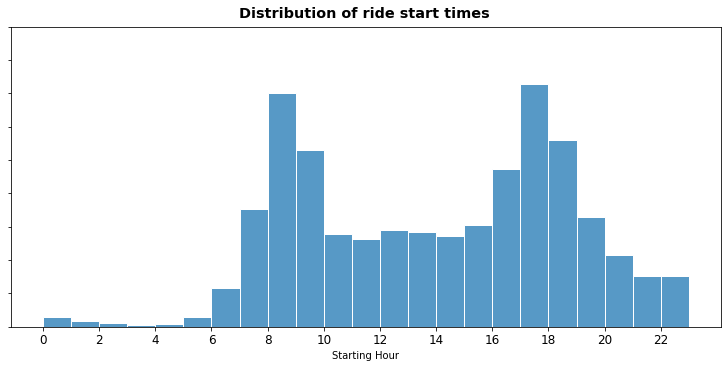

In [24]:
rc = {'figure.figsize':(10,5),
      #'axes.facecolor':'white',
      #'axes.grid' : True,
      #'grid.color': '.9', 
      'font.size' : '12',
      'axes.labelsize': '10',
      #'axes.titleweight': 'bold',
}

plt.rcParams.update(rc)



x_ticks = np.arange(0,24,2)
plt.figure(constrained_layout=True)
sb.histplot(data = bike_rides, 
    x = 'start_hour', 
    bins=np.arange(0,24,1),
    edgecolor='white')
plt.suptitle('Distribution of ride start times', fontweight='bold')
plt.ylabel('')
plt.xlabel('Starting Hour')
plt.xticks(np.arange(0,24,2))
plt.yticks(np.arange(0, 30000, 3000),labels=[]);



## Distribution of user type by rides
> There are two user types; customer and subscriber. Subscribers make up the lions share of overall ride count. The dataset doesn't identify unique subscribers (or customers for that matter); so, there's no way to compare how many subscribers and customers there are.

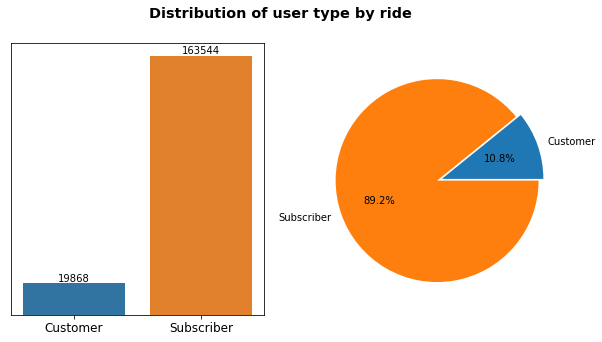

In [39]:


plt.figure(figsize=(10,5))
plt.subplot(121)
ax = sb.countplot(x='user_type', data=bike_rides)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('')
plt.yticks([])
plt.ylabel('')

plt.subplot(122)
df_user_counts=bike_rides.user_type.value_counts(ascending=True)
plt.pie(df_user_counts, 
    labels=df_user_counts.index, 
    autopct= '%1.1f%%', 
    textprops={'fontsize':10},
    explode=(0,0.05))
plt.suptitle('Distribution of user type by ride', fontweight='bold');

## Average ride duration by user type
Comparing the ride durations shows that on average, customers rides are twice as long as subscribers. This infer something about the nature of subscribers vs. customers; Are customers more likely to ride for leisure? Or, if using this bike share program is outside of their usual routine, maybe it takes them twice as long to find their way from A to B? 


Text(0.5, 0.98, 'Average Ride Duration by User Type')

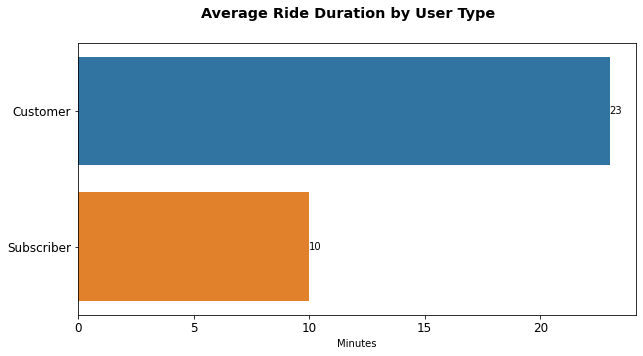

In [15]:
df_user_mean_duration = bike_rides.groupby('user_type')['duration_sec'].mean()
df_user_mean_duration = df_user_mean_duration.reset_index()

plt.figure(figsize=(10,5))
ax = sb.barplot(y = df_user_mean_duration.user_type, x = df_user_mean_duration.duration_sec // 60)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Minutes')
plt.ylabel('')
plt.suptitle('Average Ride Duration by User Type', fontweight='bold')

## Duration by day of week vs hour of day
As one might predict, rides tend to be a bit longer on Saturdays and Sundays. It is however a surprise to see that late at night and the wee hours of the morning we see longer rides too, which might indicate something about nightlife. Customer and subscribers share in this trend, with customers still having longer rides on average.


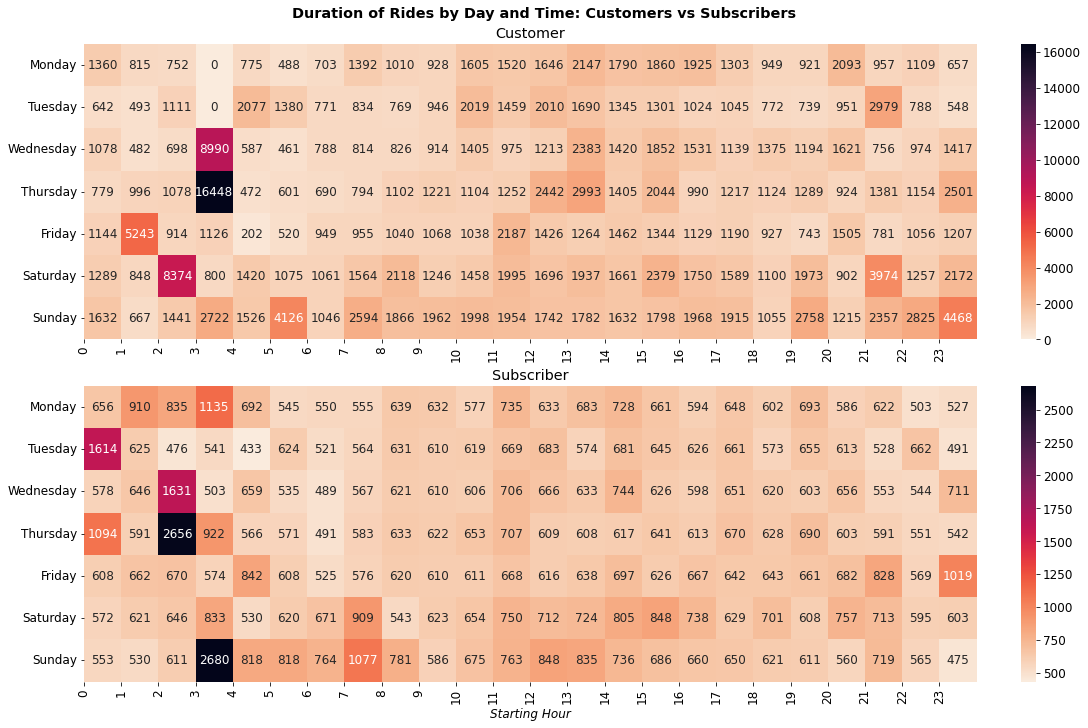

In [17]:
df_cust_dur_by_hour_day = bike_rides[bike_rides['user_type']=='Customer'].copy()[['start_hour', 'day_of_week', 'duration_sec']]
df_cust_dur_by_hour_day = df_cust_dur_by_hour_day.groupby(['start_hour', 'day_of_week']).mean().unstack('start_hour')
df_cust_dur_by_hour_day['duration_sec'] = df_cust_dur_by_hour_day.duration_sec.round()
df_cust_dur_by_hour_day.fillna(0, inplace=True)

df_sub_dur_by_hour_day = bike_rides[bike_rides['user_type']=='Subscriber'].copy()[['start_hour', 'day_of_week', 'duration_sec']]
df_sub_dur_by_hour_day = df_sub_dur_by_hour_day.groupby(['start_hour', 'day_of_week']).mean().unstack('start_hour')
df_sub_dur_by_hour_day['duration_sec'] = df_sub_dur_by_hour_day.duration_sec.round().astype('int')

plt.figure(figsize = (15, 10), constrained_layout=True)
plt.subplot(211)
sb.heatmap(df_cust_dur_by_hour_day, cmap='rocket_r', annot = True, fmt='g')
x_ticks = (np.arange(0, 24, 1))
plt.xticks(x_ticks, labels=x_ticks)
plt.ylabel(''), plt.xlabel('')
plt.title('Customer')


plt.subplot(212)
sb.heatmap(df_sub_dur_by_hour_day, cmap='rocket_r', annot = True, fmt='g')
x_ticks = (np.arange(0, 24, 1))
plt.xticks(x_ticks, labels=x_ticks)
plt.title('Subscriber')
plt.xlabel('Starting Hour', fontsize=12, fontstyle='italic')
plt.ylabel('')
plt.suptitle('Duration of Rides by Day and Time: Customers vs Subscribers', fontweight='bold');


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: line 1: Part_II_Filename: No such file or directory


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 